In [1]:
import dicom2nifti
import os
import copy
import numpy as np
import pandas as pd
import pydicom
import nibabel as nib

from scipy import ndimage as nd
from tqdm import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Following the tutorial https://github.com/miykael/3dprintyourbrain



### completing the 3D mri stl creation

In [5]:
mask = nib.load('../my-brain-models/aparc+aseg.nii')

In [6]:
mask.shape

(256, 256, 256)

In [7]:
list_aseg = [2, 3, 24, 31, 41, 42, 63, 72, 77, 51, 52, 13, 12 ,43, 50, 4 ,\
11, 26, 58, 49, 10 ,17, 18 ,53, 54, 44, 5 ,80 ,14, 15, 30, 62]

In [22]:
list_unique = np.unique(mask.get_fdata())

In [9]:
len(list_unique)

113

In [10]:
np.isin(list_unique, np.array(list_aseg))

array([False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

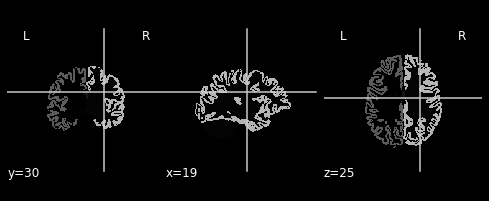

In [11]:
from nilearn import plotting
%matplotlib inline
plotting.plot_anat('../my-brain-models/aparc+aseg.nii')

In [18]:
binarised = nib.load('../my-brain-models/bin.nii')

In [21]:
np.unique(binarised.get_fdata())

array([0., 1.])

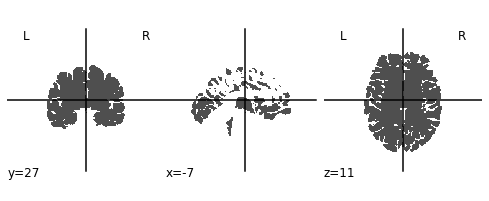

In [23]:
plotting.plot_anat('../my-brain-models/bin.nii')

#### multiplying masks

In [24]:
aseg = mask.get_fdata() * binarised.get_fdata()

In [25]:
img = nib.Nifti1Image(aseg, mask.affine)
nib.save(img, 'subcortical_tmp.nii.gz')

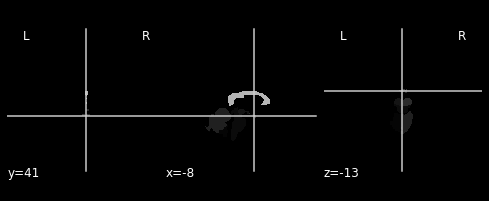

In [26]:
plotting.plot_anat('subcortical_tmp.nii.gz')

In [27]:
np.unique(aseg)

array([  0.,   7.,   8.,  16.,  28.,  46.,  47.,  60.,  85., 251., 252.,
       253., 254., 255.])

In [28]:
bin_aseg = (aseg > 1).astype(np.int32)

In [29]:
np.unique(bin_aseg)

array([0, 1], dtype=int32)

In [30]:
bin_img = nib.Nifti1Image(bin_aseg, mask.affine, mask.header)
nib.save(bin_img, 'subcortical_bin.nii')

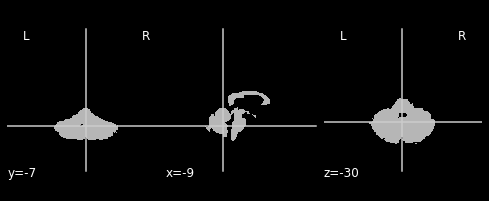

In [31]:
plotting.plot_anat('subcortical_bin.nii')

#### binarising aseg structures

In [32]:
path = '../my-brain-models/aseg.stats'

In [33]:
ColHeader = next(filter(lambda line: line.startswith('# ColHeaders'), open(path).readlines()))
        # Ignore first '#', 'ColHeaders'. Leave column names only.
names = ColHeader.split()[2:]
data = pd.read_csv(path, names=names, comment='#', delim_whitespace=True, dtype=str)

In [34]:
data

,Index,SegId,NVoxels,Volume_mm3,StructName,normMean,normStdDev,normMin,normMax,normRange
0,1,4,5407,5643.1,Left-Lateral-Ventricle,36.3986,12.4246,9.0000,91.0000,82.0000
1,2,5,234,281.3,Left-Inf-Lat-Vent,46.2521,12.8865,18.0000,79.0000,61.0000
2,3,7,11884,12487.7,Left-Cerebellum-White-Matter,79.8719,5.5408,29.0000,96.0000,67.0000
3,4,8,47645,47181.5,Left-Cerebellum-Cortex,62.7354,10.4598,3.0000,104.0000,101.0000
4,5,10,7417,7281.5,Left-Thalamus-Proper,90.3776,8.6694,36.0000,113.0000,77.0000
5,6,11,3478,3380.4,Left-Caudate,79.8125,7.3105,51.0000,105.0000,54.0000
6,7,12,4251,4433.5,Left-Putamen,83.0896,6.7776,42.0000,100.0000,58.0000
7,8,13,1631,1486.3,Left-Pallidum,93.1557,5.7185,71.0000,106.0000,35.0000
8,9,14,972,954.2,3rd-Ventricle,43.6276,15.4205,16.0000,92.0000,76.0000
9,10,15,1654,1741.4,4th-Ventricle,32.3700,10.6249,17.0000,70.0000,53.0000


In [35]:
## defining the dict of needed segmantations
list_segmentations = {
    'ventricles' : ['Left-Lateral-Ventricle', 
                  'Left-Inf-Lat-Vent', '3rd-Ventricle', '4th-Ventricle', '5rd-Ventricle','Right-Lateral-Ventricle'\
                 'Right-Inf-Lat-Vent'],
    'vessels' : ['Left-vessel','Right-vessel'],
    'corpus_collosum' :['CC_Posterior', 'CC_Mid_Posterior', 'CC_Mid_Anterior', 'CC_Mid_Anterior', 'CC_Central'],
    'optic_chiasm' : ['Optic-Chiasm'],
    'caudate' : ['Left-Caudate', 'Right-Caudate'],
    'putamen' : ['Left-Putamen', 'Right-Putamen'] ,   
    'thalamus' : ['Left-Thalamus-Proper','Right-Thalamus-Proper'],
    'brain_stem' : ['Brain-Stem'],  
    'amygdala' : ['Left-Amygdala', 'Right-Amygdala'],
    'hippocampus' : ['Left-Hippocampus','Right-Hippocampus'],
    'cerebellum_wm': ['Left-Cerebellum-White-Matter','Right-Cerebellum-White-Matter'],
    'cerebellum_cortex': ['Left-Cerebellum-Cortex','Right-Cerebellum-Cortex']
}

In [36]:
np.unique(mask.get_fdata())

array([0.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 7.000e+00,
       8.000e+00, 1.000e+01, 1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01,
       1.500e+01, 1.600e+01, 1.700e+01, 1.800e+01, 2.400e+01, 2.600e+01,
       2.800e+01, 3.000e+01, 3.100e+01, 4.100e+01, 4.300e+01, 4.400e+01,
       4.600e+01, 4.700e+01, 4.900e+01, 5.000e+01, 5.100e+01, 5.200e+01,
       5.300e+01, 5.400e+01, 5.800e+01, 6.000e+01, 6.200e+01, 6.300e+01,
       7.700e+01, 8.500e+01, 2.510e+02, 2.520e+02, 2.530e+02, 2.540e+02,
       2.550e+02, 1.000e+03, 1.001e+03, 1.002e+03, 1.003e+03, 1.005e+03,
       1.006e+03, 1.007e+03, 1.008e+03, 1.009e+03, 1.010e+03, 1.011e+03,
       1.012e+03, 1.013e+03, 1.014e+03, 1.015e+03, 1.016e+03, 1.017e+03,
       1.018e+03, 1.019e+03, 1.020e+03, 1.021e+03, 1.022e+03, 1.023e+03,
       1.024e+03, 1.025e+03, 1.026e+03, 1.027e+03, 1.028e+03, 1.029e+03,
       1.030e+03, 1.031e+03, 1.032e+03, 1.033e+03, 1.034e+03, 1.035e+03,
       2.000e+03, 2.001e+03, 2.002e+03, 2.003e+03, 

In [40]:
# defining list of files to save
segs = list(list_segmentations.keys())
# loading aparct+aseg file segmented
mask = nib.load('../my-brain-models/subcortical.nii')
seg_data = np.array(mask.get_fdata())

for i in range(len(seg_data)):
    # defining SubIds for the targeted regions
    list_tmp = data['SegId'][data['StructName'].isin(list_segmentations[segs[i]])].tolist()
    # writing the binarised mask of a region
    bin_img = nib.Nifti1Image(np.isin(seg_data, np.array(list_tmp, int))*1, mask.affine, mask.header)
    # saving file according to the dict
#     nib.save(bin_img, 'subcortical/'+segs[i]+'.nii.gz')

IndexError: list index out of range

#### binarising aparc structures

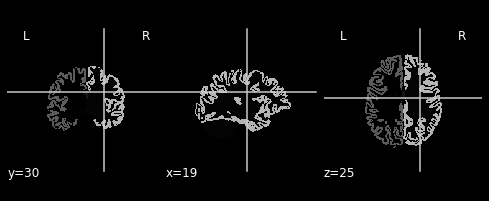

In [41]:
mask = nib.load('../my-brain-models/aparc+aseg.nii')
plotting.plot_anat('../my-brain-models/aparc+aseg.nii')

In [44]:
list_unique = np.unique(mask.get_fdata())

In [43]:
list_unique

array([   0,    2,    3,    4,    5,    7,    8,   10,   11,   12,   13,
         14,   15,   16,   17,   18,   24,   26,   28,   30,   31,   41,
         43,   44,   46,   47,   49,   50,   51,   52,   53,   54,   58,
         60,   62,   63,   77,   85,  251,  252,  253,  254,  255, 1000,
       1001, 1002, 1003, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035], dtype=int32)

#### saving all parcellatons

In [276]:
seg_data = np.array(mask.get_data())
seg_data[seg_data <1000] = 0

In [277]:
np.unique(seg_data)

array([   0, 1000, 1001, 1002, 1003, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030,
       2031, 2032, 2033, 2034, 2035], dtype=int32)

In [278]:
seg_data[seg_data >1000] = 1

In [279]:
bin_img = nib.Nifti1Image(seg_data, mask.affine, mask.header)
    # saving file according to the dict
# nib.save(bin_img, 'aparc/cortex.nii.gz')

#### saving by region

In [45]:
data = pd.read_csv('../my-brain-models/aparc.annot.ctab', delim_whitespace=True, dtype=str)

In [46]:
data.head()

,0,unknown,25,5,25.1,0.1
0,1,bankssts,25,100,40,0
1,2,caudalanteriorcingulate,125,100,160,0
2,3,caudalmiddlefrontal,100,25,0,0
3,4,corpuscallosum,120,70,50,0
4,5,cuneus,220,20,100,0


In [47]:
list_parcellations = {
    'frontal_lobe' : ['superiorfrontal','medialorbitofrontal','caudalmiddlefrontal','lateralorbitofrontal','frontalpole','rostralmiddlefrontal'],
    'wernike' : ['superiortemporal','supramarginal'],
    'broca': ['parstriangularis','parsopercularis'],
    'temporal': ['superiortemporal','middletemporal','inferiortemporal','supramarginal','precentral','postcentral'],
    'parietal': ['superiorparietal','inferiorparietal'],
    'occipital' : ['lateraloccipital']
}

In [274]:
# checking the selection
parcs = list(list_parcellations.keys())
list_tmp = data['0'][data['unknown'].isin(list_parcellations[parcs[0]])].tolist()
np.append(np.array(list_tmp, int) + 1000,np.array(list_tmp, int) + 2000)

array([1009, 1015, 1022, 1024, 1030, 1031, 2009, 2015, 2022, 2024, 2030,
       2031])

In [275]:
# defining list of files to save
parcs = list(list_parcellations.keys())
# loading aparct+aseg file segmented
mask = nib.load('../my-brain-models/aparc+aseg.nii')
parc_data = np.array(mask.get_data())

for i in range(len(list_parcellations)):
    # defining SubIds for the targeted regions
    list_tmp = data['0'][data['unknown'].isin(list_parcellations[parcs[i]])].tolist()
    
    # translating SegID according to the documentation
    parc_array = np.append(np.array(list_tmp, int) + 1000, np.array(list_tmp, int) + 2000)
    
    # writing the binarised mask of a region
    bin_img = nib.Nifti1Image(np.isin(parc_data, parc_array)*1, mask.affine, mask.header)
    
    # saving file according to the dict
#     nib.save(bin_img, 'aparc/'+ parcs[i]+'.nii.gz')